In [6]:
%matplotlib inline

import ipyparallel as ipp
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import MESS

from collections import OrderedDict

## Set some pandas options to show the full rows and columns of a DF
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## Where do you want simulations to live?

analysis_dir = "/home/juliette/Documents/internship_m1_MESS/MESS/fig3/"
analysis_dir_cont = "/home/juliette/Documents/internship_m1_MESS/MESS/fig3_cont/"



## Figure 3 - Summaries of distributions through time
![Figure3 Cartoon](files/Fig3-mockup.png "MESS Figure 3 Cartoon")

## Generate simulations for figure 3
Here we fix all parameters except speciation rate and community assembly model. Generate 1000 simulations for each of the configurations (hi, lo, no speciation) and (neut, filt, comp) assembly.

In [ ]:
r = MESS.Region("figure3")
## Region params
r.set_param("project_dir", analysis_dir)
r.set_param("generations", 0)
r.set_param("mutation_rate", 2.2e-8)
r.set_param("alpha", 2000)
r.set_param("community_assembly_model", "*")

## Metacommunity Params
r.set_param("S_m", 250)
r.set_param("J_m", 750000)
r.set_param("speciation_rate", 2)
r.set_param("death_proportion", 0.7)
r.set_param("trait_rate_meta", 2)
r.set_param("ecological_strength", 1)

## Local Params
r.set_param("J", 1000)
r.set_param("m", 0.005)

for sp_prob in [0, 0.0005, 0.005]:
    r.set_param("speciation_prob", sp_prob)
    r.write_params(outfile="params-fig3-sp{}.txt".format(sp_prob), force=True)
    r.run(sims=1000, ipyclient=ipyclient)

## Generate the figure

In [10]:
simfile = "/home/juliette/Documents/internship_m1_MESS/MESS/fig3/OUT_modif.txt"
simfile_cont = "/home/juliette/Documents/internship_m1_MESS/MESS/fig3_cont/OUT_modif.txt"
simfile_cont2 = "/home/juliette/Documents/internship_m1_MESS/MESS/fig3_cont/SIMOUT2.txt"

sim_df = pd.read_csv(simfile, sep="\t", header=0)
sim_df_cont = pd.read_csv(simfile_cont, sep="\t", header=0)
#sim_df_cont2 = pd.read_csv(simfile_cont2, sep="\t", header=0)
#display(sim_df_cont2)
#sim_df_cont = pd.concat([sim_df_cont, sim_df_cont2])

## Remove degenerate trait hill sims
sim_df = sim_df[sim_df["S"] >= sim_df["trait_h1"]]
## Drop sims that are exactly _lambda == 1
sim_df = sim_df[sim_df["_lambda"] < 1]

## Remove degenerate trait hill sims
sim_df_cont = sim_df_cont[sim_df_cont["S"] >= sim_df_cont["trait_h1"]]
## Drop sims that are exactly _lambda == 1
sim_df_cont = sim_df_cont[sim_df_cont["_lambda"] < 1]

comp_df = sim_df[sim_df["community_assembly_model"] == "competition"]
filt_df = sim_df[sim_df["community_assembly_model"] == "filtering"]
neut_df = sim_df[sim_df["community_assembly_model"] == "neutral"]
pw_df = sim_df[sim_df["community_assembly_model"]=="pairwise_competition"]
print(len(neut_df), len(filt_df), len(comp_df), len(pw_df))


neut_df_cont = sim_df_cont[1 - sim_df_cont["filtering"] -  sim_df_cont["competition"] > sim_df_cont["filtering"]]
neut_df_cont = neut_df_cont[1 - neut_df_cont["filtering"] -  neut_df_cont["competition"] > neut_df_cont["competition"]]
filt_df_cont = sim_df_cont[sim_df_cont["filtering"] > sim_df_cont["competition"]]
filt_df_cont = filt_df_cont[filt_df_cont["filtering"] > 1 - filt_df_cont["competition"] - filt_df_cont["filtering"]]
pw_df_cont = sim_df_cont[sim_df_cont["filtering"] < sim_df_cont["competition"]]
pw_df_cont = pw_df_cont[pw_df_cont["competition"] > 1 - pw_df_cont["competition"] - pw_df_cont["filtering"]]
print(len(neut_df_cont), len(filt_df_cont),  len(pw_df_cont))

1913 1608 1672 1810
1345 1262 1333


In [3]:
display(sim_df)
display(sim_df_cont)

seed    S_m       J_m  speciation_rate  death_proportion  trait_rate_meta  ecological_strength  intrasp_competition_a  intrasp_competition_b  intersp_competition_a  intersp_competition_b  mutualism_proportion generations community_assembly_model speciation_model  mutation_rate   alpha  sequence_length       J      m  speciation_prob  generation  _lambda  migrate_calculated  extrate_calculated  trait_rate_local  filtering_optimum     S  abund_h1  abund_h2  abund_h3  abund_h4     pi_h1     pi_h2    pi_h3    pi_h4  mean_pi   std_pi  skewness_pi  kurtosis_pi  median_pi   iqr_pi  mean_dxys  std_dxys  skewness_dxys  kurtosis_dxys  median_dxys  iqr_dxys  trees  trait_h1  trait_h2  trait_h3  trait_h4  mean_local_traits  std_local_traits  skewness_local_traits  kurtosis_local_traits  median_local_traits  iqr_local_traits  mean_regional_traits  std_regional_traits  skewness_regional_traits  kurtosis_regional_traits  median_regional_traits  iqr_regional_traits  \
0     1.054830e+09  250.0  500000.0              2.0               0.7              2.0                  0.1                   -1.0                   -1.0                   -1.0                   -1.0                   0.0     0.91356                  neutral   point_mutation            0.0  2000.0            570.0  1000.0  0.005           0.0000        10.0    0.052             0.00520             0.00220           0.58824            0.90585  10.0   1.34575   1.11198   1.08339   1.07380   1.00000   1.00000  1.00000  1.00000  0.00004  0.00011      2.66667      5.11111    0.00000  0.00000    0.00040   0.00053        1.55933        1.32917      0.00018   0.00053    0.0   9.18499   7.91393   7.63783   7.52231           -0.41062           2.39318                0.90942               -0.76808             -1.69426           2.66125              -0.26093              3.35626                  -0.59441                   0.29933                -0.51275              4.51929   
2     8.920998e+08  250.0  500000.0              2.0               0.7              2.0                  0.1                   -1.0                   -1.0                   -1.0                   -1.0                   0.0       0.678                  neutral   point_mutation            0.0  2000.0            570.0  1000.0  0.005           0.0000       162.0    0.235             0.00510             0.00302           0.58824           -0.66483  13.0   2.44529   1.65332   1.49072   1.42888   1.85381   1.74227  1.66448  1.61211  0.00023  0.00059      2.47279      4.71599    0.00000  0.00000    0.00131   0.00163        1.22820        0.43696      0.00105   0.00175    0.0   5.28856   3.99370   3.66105   3.51168           -0.33759           3.79972                0.23473               -1.20266             -1.95669           6.31521               0.17093              3.79387                  -0.01606                  -1.12524                 0.09258              6.62269   
5     1.375881e+09  250.0  500000.0              2.0               0.7              2.0                  0.1                   -1.0                   -1.0                   -1.0                   -1.0                   0.0     0.19967                  neutral   point_mutation            0.0  2000.0            570.0  1000.0  0.005           0.0000       244.0    0.553             0.00514             0.00273           0.58824           -0.84198  18.0   6.33228   4.01239   3.23822   2.90102  11.78748  10.14971  9.23570  8.65936  0.00138  0.00122      0.70285     -0.61183    0.00105  0.00158    0.00361   0.00342        1.74364        3.19100      0.00316   0.00351    0.0   8.74122   6.38098   5.53194   5.12595            1.05951           2.02680               -0.20556               -1.03189              1.42777           3.32442               0.91606              2.54617                  -0.08262                  -0.59807                 0.93059              3.50335   
6     1.851209e+09  250.0  500000.0              2.0               0.7              2.0   

seed    S_m       J_m  speciation_rate  death_proportion  trait_rate_meta  ecological_strength  intrasp_competition  intersp_competition  mutualism_proportion  generations  filtering  competition speciation_model  mutation_rate   alpha  sequence_length       J      m  speciation_prob  generation  _lambda  migrate_calculated  extrate_calculated  trait_rate_local  filtering_optimum     S  abund_h1  abund_h2  abund_h3  abund_h4     pi_h1     pi_h2     pi_h3     pi_h4  mean_pi   std_pi  skewness_pi  kurtosis_pi  median_pi   iqr_pi  mean_dxys  std_dxys  skewness_dxys  kurtosis_dxys  median_dxys  iqr_dxys  trees  trait_h1  trait_h2  trait_h3  trait_h4  mean_local_traits  std_local_traits  skewness_local_traits  kurtosis_local_traits  median_local_traits  iqr_local_traits  mean_regional_traits  std_regional_traits  skewness_regional_traits  kurtosis_regional_traits  median_regional_traits  iqr_regional_traits  reg_loc_mean_trait_dif  reg_loc_std_trait_dif  \
0     1.858386e+09  250.0  500000.0              2.0               0.7              2.0                  0.1                 -1.0                 -1.0                   0.0      0.17392    0.36144      0.27543   point_mutation            0.0  2000.0            570.0  1000.0  0.005           0.0000        29.0    0.324             0.00510             0.00241           0.58824           -7.50101  19.0   3.80691   2.11501   1.79623   1.68533   4.60728   3.81839   3.45295   3.27678  0.00024  0.00047      2.18850      3.36971    0.00000  0.00035    0.00108   0.00090        0.12718       -1.46127      0.00105   0.00167    0.0   8.47818   6.12510   5.49112   5.18433           -3.62370           2.48870               -0.34918               -0.36791             -3.20645           2.66953              -3.22496              2.76658                   1.05063                   2.68147                -3.38671              3.21509                 0.39874                0.27788   
1     1.200478e+08  250.0  500000.0              2.0               0.7              2.0                  0.1                 -1.0                 -1.0                   0.0      0.22417    0.20254      0.40977   point_mutation            0.0  2000.0            570.0  1000.0  0.005           0.0000        27.0    0.448             0.00548             0.00237           0.58824            5.04804  16.0   5.24397   3.00571   2.42294   2.20698   3.88270   3.75752   3.63257   3.51583  0.00018  0.00033      1.46676      0.69232    0.00000  0.00016    0.00092   0.00174        1.60977        0.72129      0.00000   0.00044    0.0   9.56454   6.69161   5.81147   5.41503            0.83559           3.52999                0.01682               -0.91864              0.24336           5.10540               1.06329              3.03972                  -0.11162                  -0.34349                 0.99688              4.43064                 0.22771               -0.49027   
2     8.844949e+08  250.0  500000.0              2.0               0.7              2.0                  0.1                 -1.0                 -1.0                   0.0      0.10304    0.19772      0.29372   point_mutation            0.0  2000.0            570.0  1000.0  0.005           0.0000        32.0    0.470             0.00512             0.00238           0.58824            3.10936  13.0   4.93748   3.07671   2.53943   2.32155   2.58641   2.27273   2.07614   1.96005  0.00013  0.00029      2.34512      4.46237    0.00000  0.00000    0.00054   0.00062        0.98896       -0.33095      0.00035   0.00070    0.0   5.59989   4.42966   3.97675   3.75711            1.30603           2.73031                0.87381               -0.24792              0.53445           3.54283               1.03762              3.42705                   0.34752                  -0.44400                 0.39179              5.10741                -0.26841                0.69675   
3     1.762569e+08  250.0  500000.0              2.0               0.7              2.0       

In [11]:
stat_dict = OrderedDict({})
stat_dict["Richness"] = ["S"]
stat_dict["Abundance Diversity"] = ["abund_h1", "abund_h2", "abund_h3", "abund_h4"]
stat_dict["Genetic Diversity"] = ["pi_h1", "pi_h2", "pi_h3", "pi_h4"]
stat_dict["Trait Diversity"] = ["trait_h1", "trait_h2", "trait_h3", "trait_h4"]

def plot_sumstats_through_time(sim_df, scatter=True, normalize_hills=False):
    ## Get min and max y values so the y values can be scaled identically w/in columns
    def min_max(df, stat):
        return min(df[stat]), max(df[stat])
    ylims = {x:min_max(sim_df, stat_dict[x][0]) for x in stat_dict.keys()}

    fig, axs = plt.subplots(3, 4, figsize=(20, 10))

    for i, (spec_label, spec_prob) in enumerate(zip(["High", "Low", "No"], [0.005, 0.0005, 0])):
        x = sim_df.loc[sim_df["speciation_prob"] == spec_prob]["_lambda"]
        #import pdb; pdb.set_trace()
        for j, sumstats in enumerate(stat_dict):
            for stat in stat_dict[sumstats]:
                y = sim_df.loc[sim_df["speciation_prob"] == spec_prob]
                ## Plotting
                if normalize_hills and not stat == "S":
                    y = y[stat]/y["S"]
                else:
                    y = y[stat]
                z = np.poly1d(np.polyfit(x,y,4))
                xs_z = np.linspace(0, max(x), 1000)
                if scatter: axs[i][j].scatter(x, y, alpha=0.2, marker='.')
                axs[i][j].plot(xs_z, z(xs_z), label=stat, lw=3)

                ## Labeling and cleaning up the plots
                axs[i][j].set_title(sumstats)
                axs[i][j].set_ylabel(spec_label)
                axs[i][j].set_ylim(ylims[sumstats])
    plt.tight_layout()


In [12]:
stat_dict = OrderedDict({})
stat_dict["Richness"] = ["S"]
stat_dict["Abundance Diversity"] = ["abund_h1", "abund_h2", "abund_h3", "abund_h4"]
stat_dict["Genetic Diversity"] = ["pi_h1", "pi_h2", "pi_h3", "pi_h4"]
stat_dict["Trait Diversity"] = ["trait_h1", "trait_h2", "trait_h3", "trait_h4"]

def plot_sumstats_through_time_cont(sim_df, scatter=True, normalize_hills=False):
    ## Get min and max y values so the y values can be scaled identically w/in columns
    def min_max(df, stat):
        return min(df[stat]), max(df[stat])
    ylims = {x:min_max(sim_df, stat_dict[x][0]) for x in stat_dict.keys()}

    fig, axs = plt.subplots(3, 4, figsize=(20, 10))

    for i, (spec_label, spec_prob) in enumerate(zip(["High", "Low", "No"], [0.005, 0.0005, 0])):
        x = sim_df.loc[sim_df["speciation_prob"] == spec_prob]["_lambda"]
        #import pdb; pdb.set_trace()
        for j, sumstats in enumerate(stat_dict):
            for stat in stat_dict[sumstats]:
                y = sim_df.loc[sim_df["speciation_prob"] == spec_prob]
                ## Plotting
                if normalize_hills and not stat == "S":
                    y = y[stat]/y["S"]
                else:
                    y = y[stat]
                z = np.poly1d(np.polyfit(x,y,4))
                xs_z = np.linspace(0, max(x), 1000)
                if scatter: axs[i][j].scatter(x, y, alpha=0.2, marker='.')
                axs[i][j].plot(xs_z, z(xs_z), label=stat, lw=3)

                ## Labeling and cleaning up the plots
                axs[i][j].set_title(sumstats)
                axs[i][j].set_ylabel(spec_label)
                axs[i][j].set_ylim(ylims[sumstats])
    plt.tight_layout()


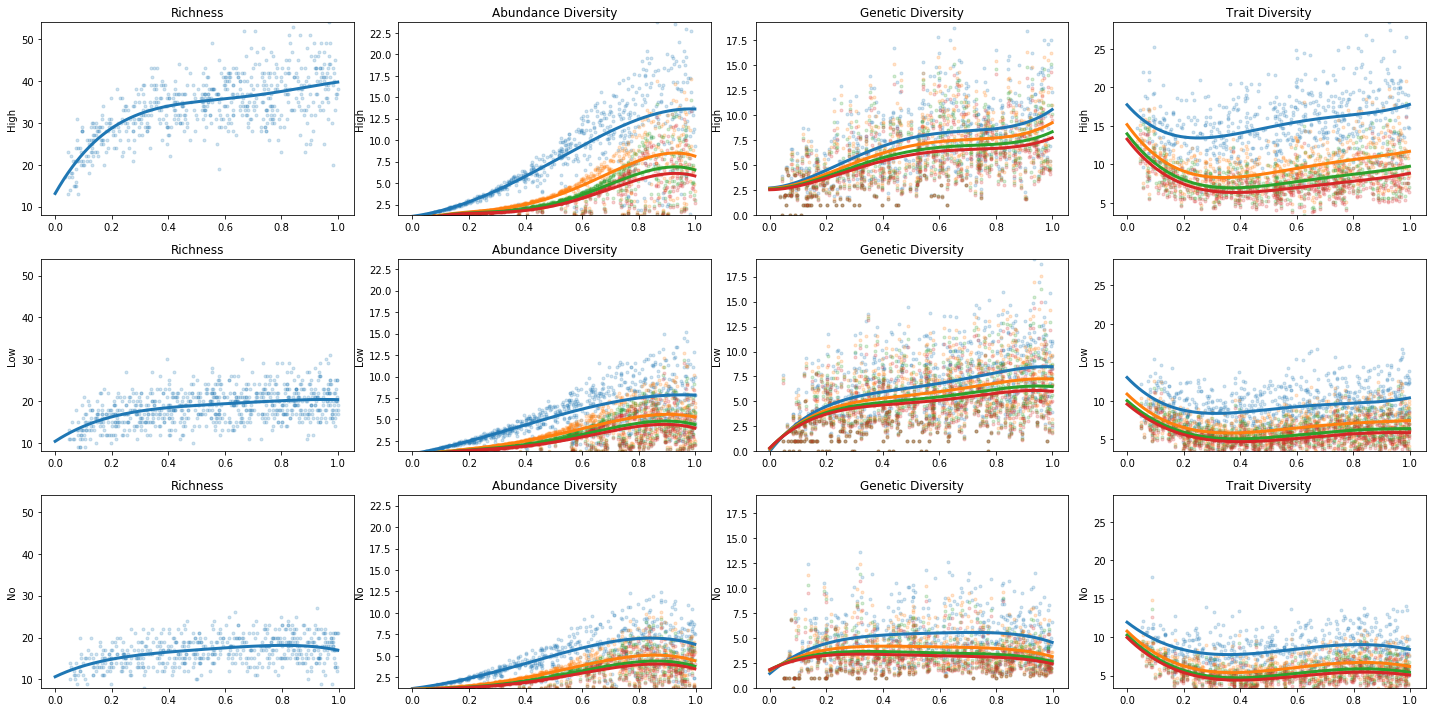

In [6]:
%matplotlib inline
plot_sumstats_through_time(neut_df, scatter=True, normalize_hills=False)

filtering
mean
pw


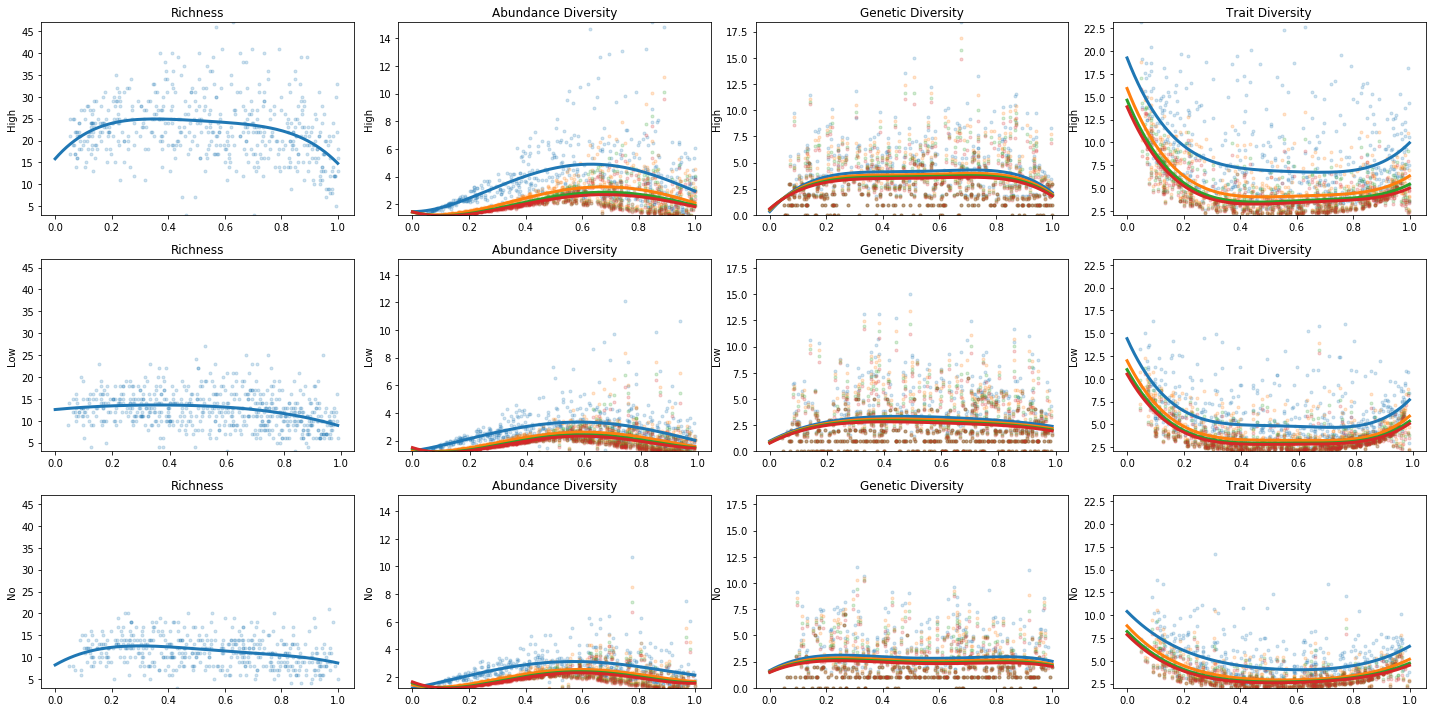

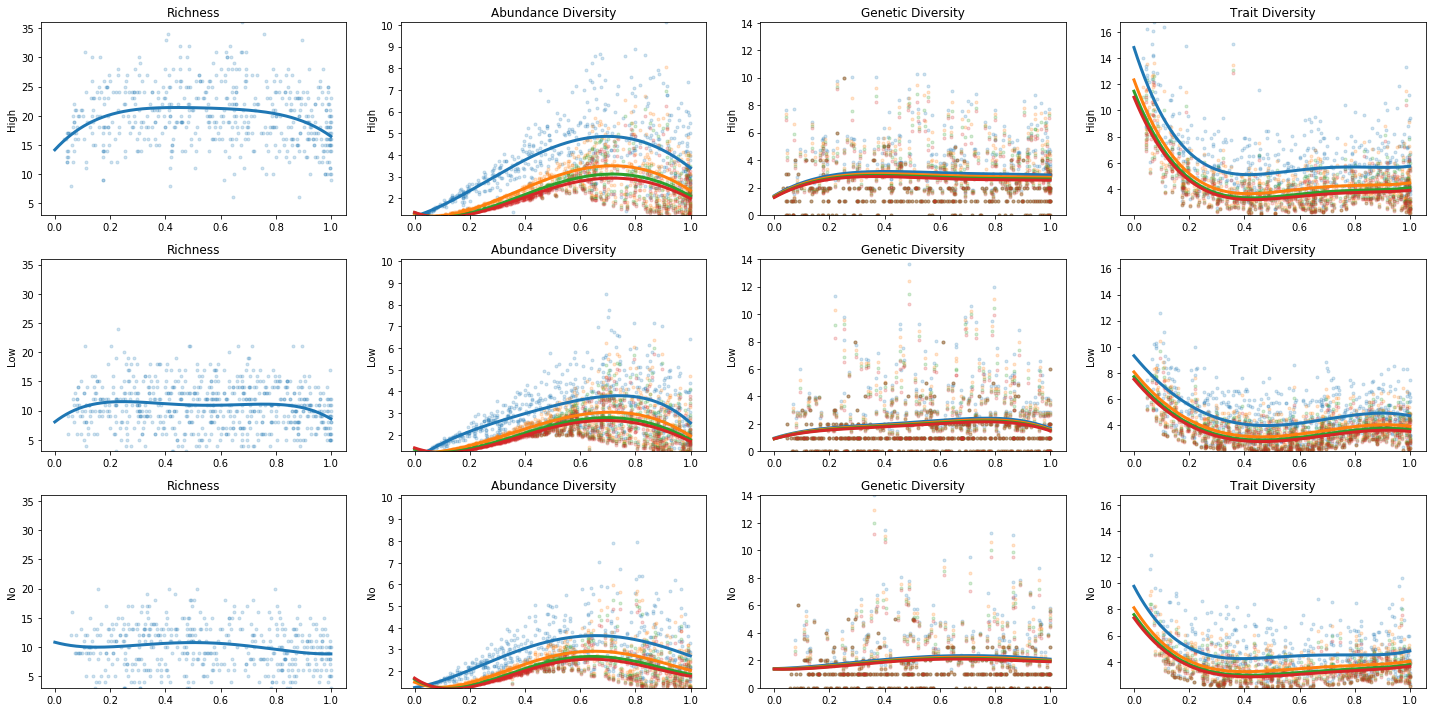

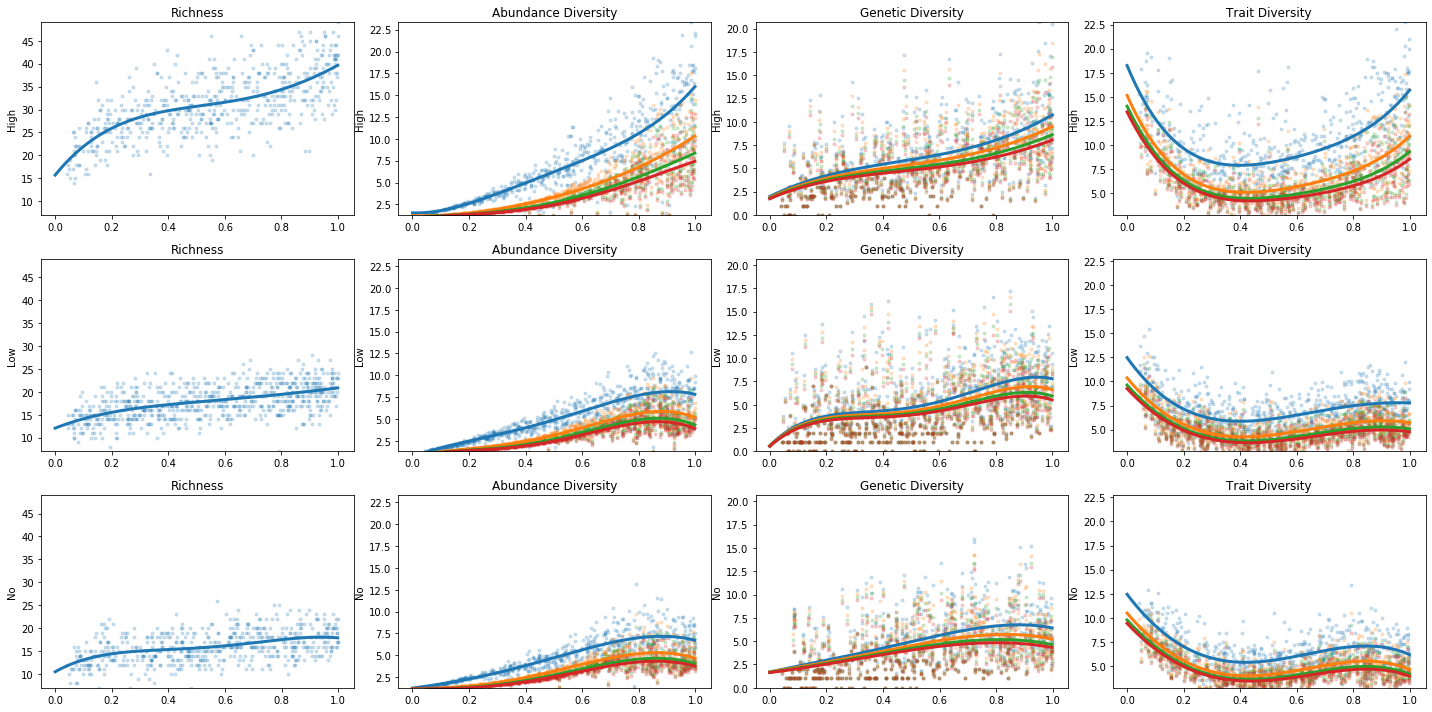

In [7]:
print("filtering")
plot_sumstats_through_time(filt_df, scatter=True, normalize_hills=False)
print("mean")
plot_sumstats_through_time(comp_df, scatter=True, normalize_hills=False)
print("pw")
plot_sumstats_through_time(pw_df, scatter=True, normalize_hills=False)

# Manuscript Figure 3. Plot all assembly models on one figure.


In [13]:
def plot_combined_sumstats_through_time(sim_df, scatter=True, normalize_hills=False, n_hills=2, degree=4):
    ## Get min and max y values so the y values can be scaled identically w/in columns
    def min_max(df, stat):
        return min(df[stat]), max(df[stat])
    ylims = {x:min_max(sim_df, stat_dict[x][0]) for x in stat_dict.keys()}
    ## Hax
    ylims = {"Richness":(0,60), "Abundance Diversity":(0,25), "Genetic Diversity":(0,20), "Trait Diversity":(0,30)}
    plot_labels = {"Richness":"S", "Abundance Diversity":r"$^\mathit{1}D$",\
                   "Genetic Diversity":r"$^\mathit{1}GD$", "Trait Diversity":r"$^\mathit{1}FD$"}
    if normalize_hills: ylims = {"Richness":(0,85), "Abundance Diversity":(0,0.6),\
                                 "Genetic Diversity":(0,0.6), "Trait Diversity":(0.1,1)}

    fig, axs = plt.subplots(3, 4, figsize=(25, 15), sharey=False, sharex=True)

    for i, (spec_label, spec_prob) in enumerate(zip(["High Speciation", "Low Speciation", "No Speciation"], [0.005, 0.0005, 0])):
        
        for j, sumstats in enumerate(stat_dict):
            for stat in stat_dict[sumstats][:n_hills]:
                for model, ls, c in zip(["neutral", "filtering", "competition", "pairwise_competition"],\
                                     #["solid", "dashed", "dotted"],
                                     ["solid", "solid", "solid", "solid"],
                                     MESS.plotting.model_colors.values()):
                    
                    x = sim_df.loc[sim_df["community_assembly_model"] == model]
                    x = x.loc[x["speciation_prob"] == spec_prob]["_lambda"]
                    y = sim_df.loc[sim_df["community_assembly_model"] == model]
                    y = y.loc[y["speciation_prob"] == spec_prob]
                    
                    ## Plotting
                    if normalize_hills and not stat == "S":
                        y = y[stat]/y["S"]
                    else:
                        y = y[stat]
                    z = np.poly1d(np.polyfit(x,y,degree))
                    xs_z = np.linspace(0, max(x), 1000)
                    if scatter: axs[i][j].scatter(x, y, alpha=0.5, marker='.', c=c)
                    axs[i][j].plot(xs_z, z(xs_z), label=stat, ls=ls, c=c, linewidth=6)

                    ## Labeling and cleaning up the plots
                    if i % 4 == 0:
                        axs[i][j].set_title(plot_labels[sumstats], fontsize=30)
                    if i == 2:
                        axs[i][j].set_xlabel(u"Λ", fontsize=30)
                    if j % 4 == 0:
                        axs[i][j].set_ylabel("{}\n\n{}".format(spec_label, "# Species"), fontsize=30)
                    axs[i][j].set_ylim(ylims[sumstats])

    ## Make axis ticklabels easier to read
    [plt.setp(ax.get_xticklabels(), fontsize=20) for ax in axs.flatten()]
    [plt.setp(ax.get_yticklabels(), fontsize=20) for ax in axs.flatten()]
    
    plt.tight_layout()
    plt.show()
    #plt.savefig(analysis_dir + "fig3-combined.png")
plot_combined_sumstats_through_time(sim_df, scatter=True, normalize_hills=False, n_hills=1, degree=3)

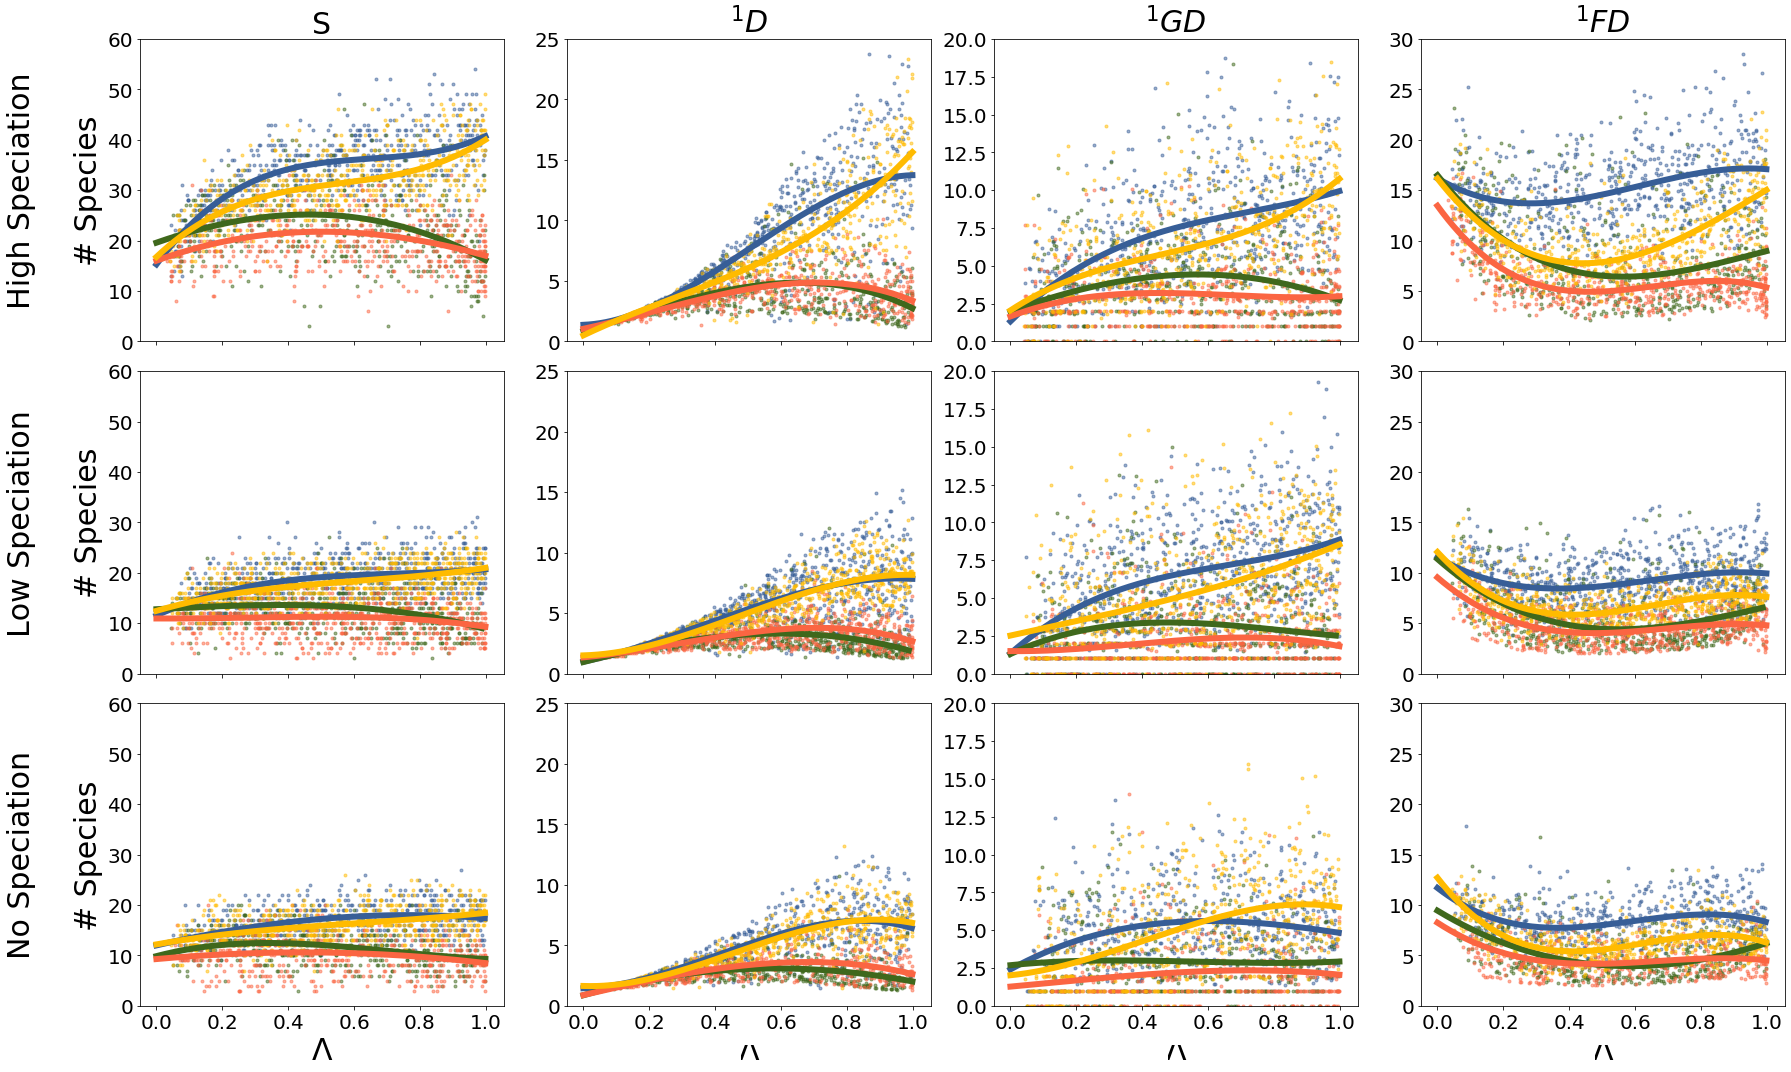

In [15]:
%matplotlib inline
plot_combined_sumstats_through_time(sim_df, scatter=True, normalize_hills=False, n_hills=1, degree=3)

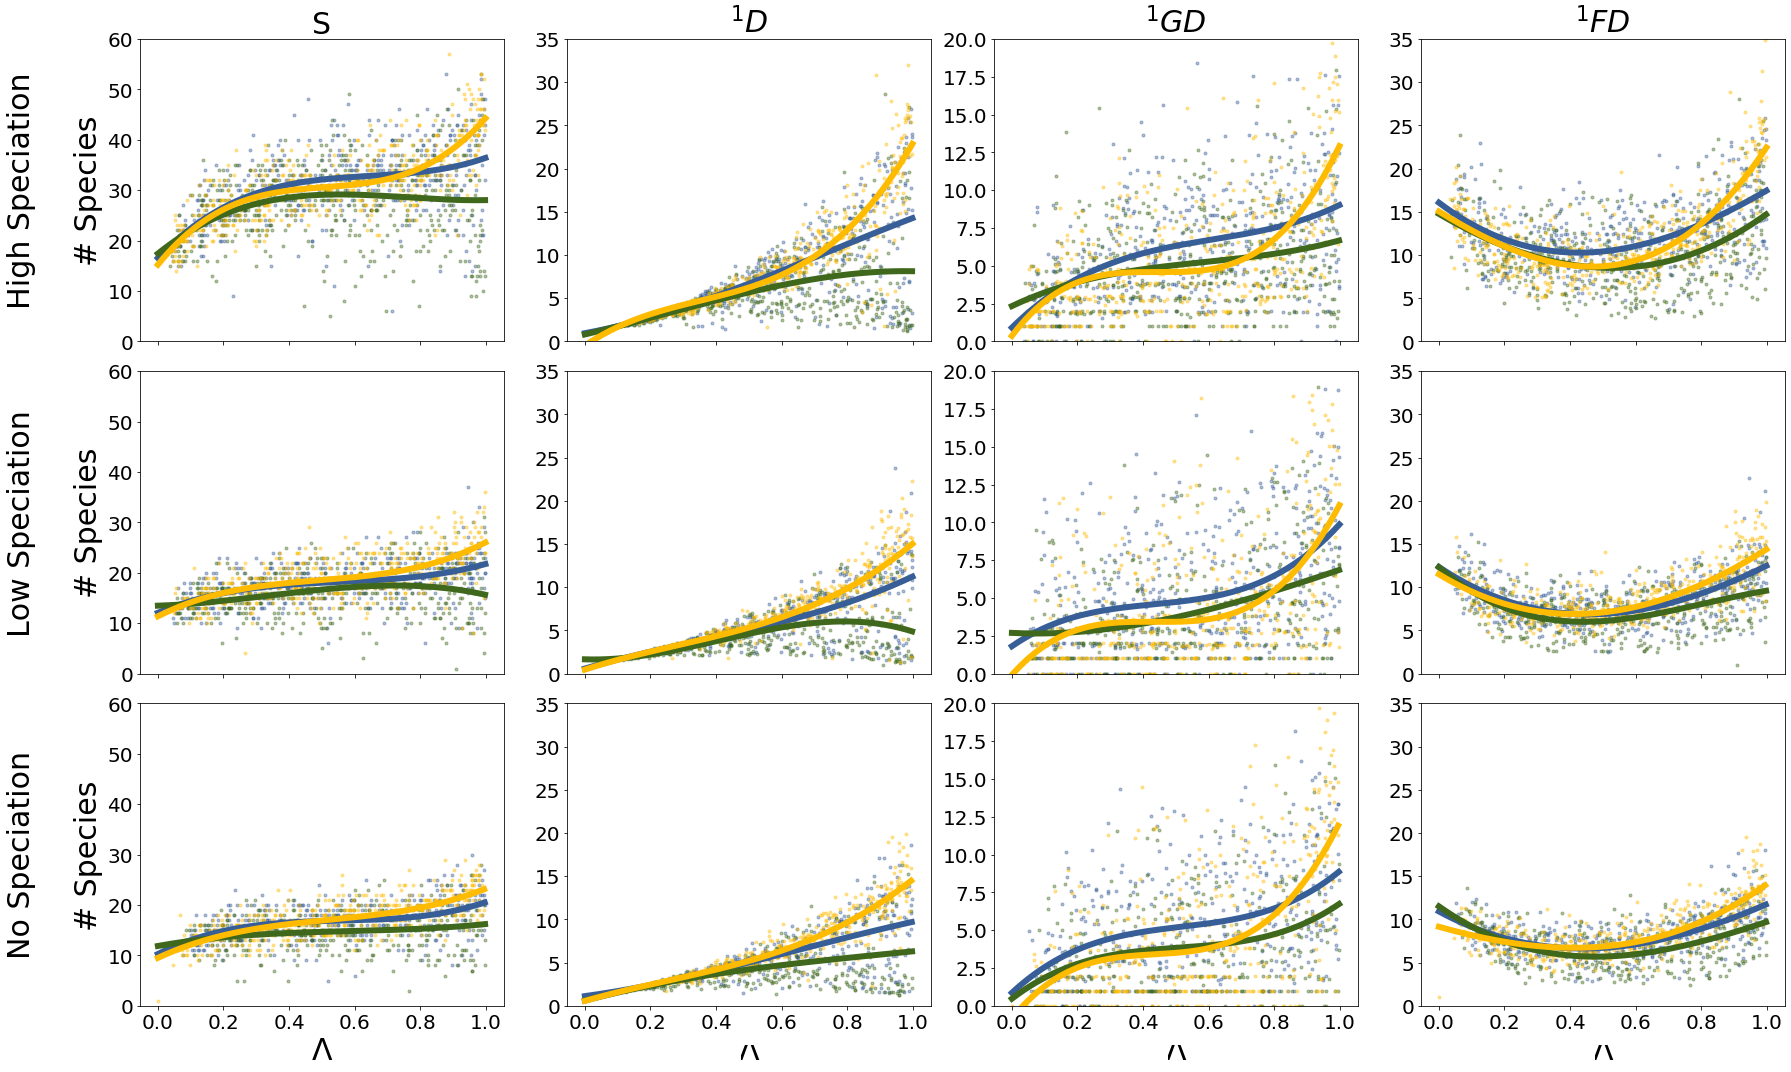

In [17]:
def plot_combined_sumstats_through_time_cont(sim_df, scatter=True, normalize_hills=False, n_hills=2, degree=4):
    ## Get min and max y values so the y values can be scaled identically w/in columns
    pw = sim_df[sim_df["competition"]>sim_df["filtering"]]
    pw = pw[pw["competition"]>1-pw["filtering"]-pw["competition"]]

    filt = sim_df[sim_df["competition"]<sim_df["filtering"]]
    filt = filt[filt["filtering"]>1-filt["filtering"]-filt["competition"]]

    neutral = sim_df[sim_df["competition"]<1-sim_df["competition"]-sim_df["filtering"]]
    neutral = neutral[neutral["filtering"]<1-neutral["competition"]-neutral["filtering"]]
    
    def min_max(df, stat):
        return min(df[stat]), max(df[stat])
    ylims = {x:min_max(sim_df, stat_dict[x][0]) for x in stat_dict.keys()}
    ## Hax
    ylims = {"Richness":(0,60), "Abundance Diversity":(0,35), "Genetic Diversity":(0,20), "Trait Diversity":(0,35)}
    plot_labels = {"Richness":"S", "Abundance Diversity":r"$^\mathit{1}D$",\
                   "Genetic Diversity":r"$^\mathit{1}GD$", "Trait Diversity":r"$^\mathit{1}FD$"}
    if normalize_hills: ylims = {"Richness":(0,60), "Abundance Diversity":(0,0.6),\
                                 "Genetic Diversity":(0,0.6), "Trait Diversity":(0.1,1)}

    fig, axs = plt.subplots(3, 4, figsize=(25, 15), sharey=False, sharex=True)

    for i, (spec_label, spec_prob) in enumerate(zip(["High Speciation", "Low Speciation", "No Speciation"], [0.005, 0.0005, 0])):
        
        for j, sumstats in enumerate(stat_dict):
            for stat in stat_dict[sumstats][:n_hills]:
                for X, ls, c in zip([neutral, filt, pw],\
                                     #["solid", "dashed", "dotted"],
                                     ["solid", "solid", "solid", "solid"],
                                     ["#375E97","#3F681C","#FFBB00"]):
                    
                    #x = sim_df.loc[sim_df["community_assembly_model"] == model]
                    x = X.loc[X["speciation_prob"] == spec_prob]["_lambda"]
                    #y = sim_df.loc[sim_df["community_assembly_model"] == model]
                    y = X.loc[X["speciation_prob"] == spec_prob]
                    
                    ## Plotting
                    if normalize_hills and not stat == "S":
                        y = y[stat]/y["S"]
                    else:
                        y = y[stat]
                    z = np.poly1d(np.polyfit(x,y,degree))
                    xs_z = np.linspace(0, max(x), 1000)
                    if scatter: axs[i][j].scatter(x, y, alpha=0.4, marker='.', c=c)
                    axs[i][j].plot(xs_z, z(xs_z), label=stat, lw=6, ls=ls, c=c)

                    ## Labeling and cleaning up the plots
                    if i % 4 == 0:
                        axs[i][j].set_title(plot_labels[sumstats], fontsize=30)
                    if i == 2:
                        axs[i][j].set_xlabel(u"Λ", fontsize=30)
                    if j % 4 == 0:
                        axs[i][j].set_ylabel("{}\n\n{}".format(spec_label, "# Species"), fontsize=30)
                    axs[i][j].set_ylim(ylims[sumstats])

    ## Make axis ticklabels easier to read
    [plt.setp(ax.get_xticklabels(), fontsize=20) for ax in axs.flatten()]
    [plt.setp(ax.get_yticklabels(), fontsize=20) for ax in axs.flatten()]
    
    plt.tight_layout()
    plt.savefig(analysis_dir_cont + "fig3-combined.svg")
plot_combined_sumstats_through_time_cont(sim_df_cont, scatter=True, normalize_hills=False, n_hills=1, degree=3)

In [13]:
plot_combined_sumstats_through_time(sim_df, scatter=True, normalize_hills=True, n_hills=1, degree=2)

/home/juliette/miniconda3/envs/MESS/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


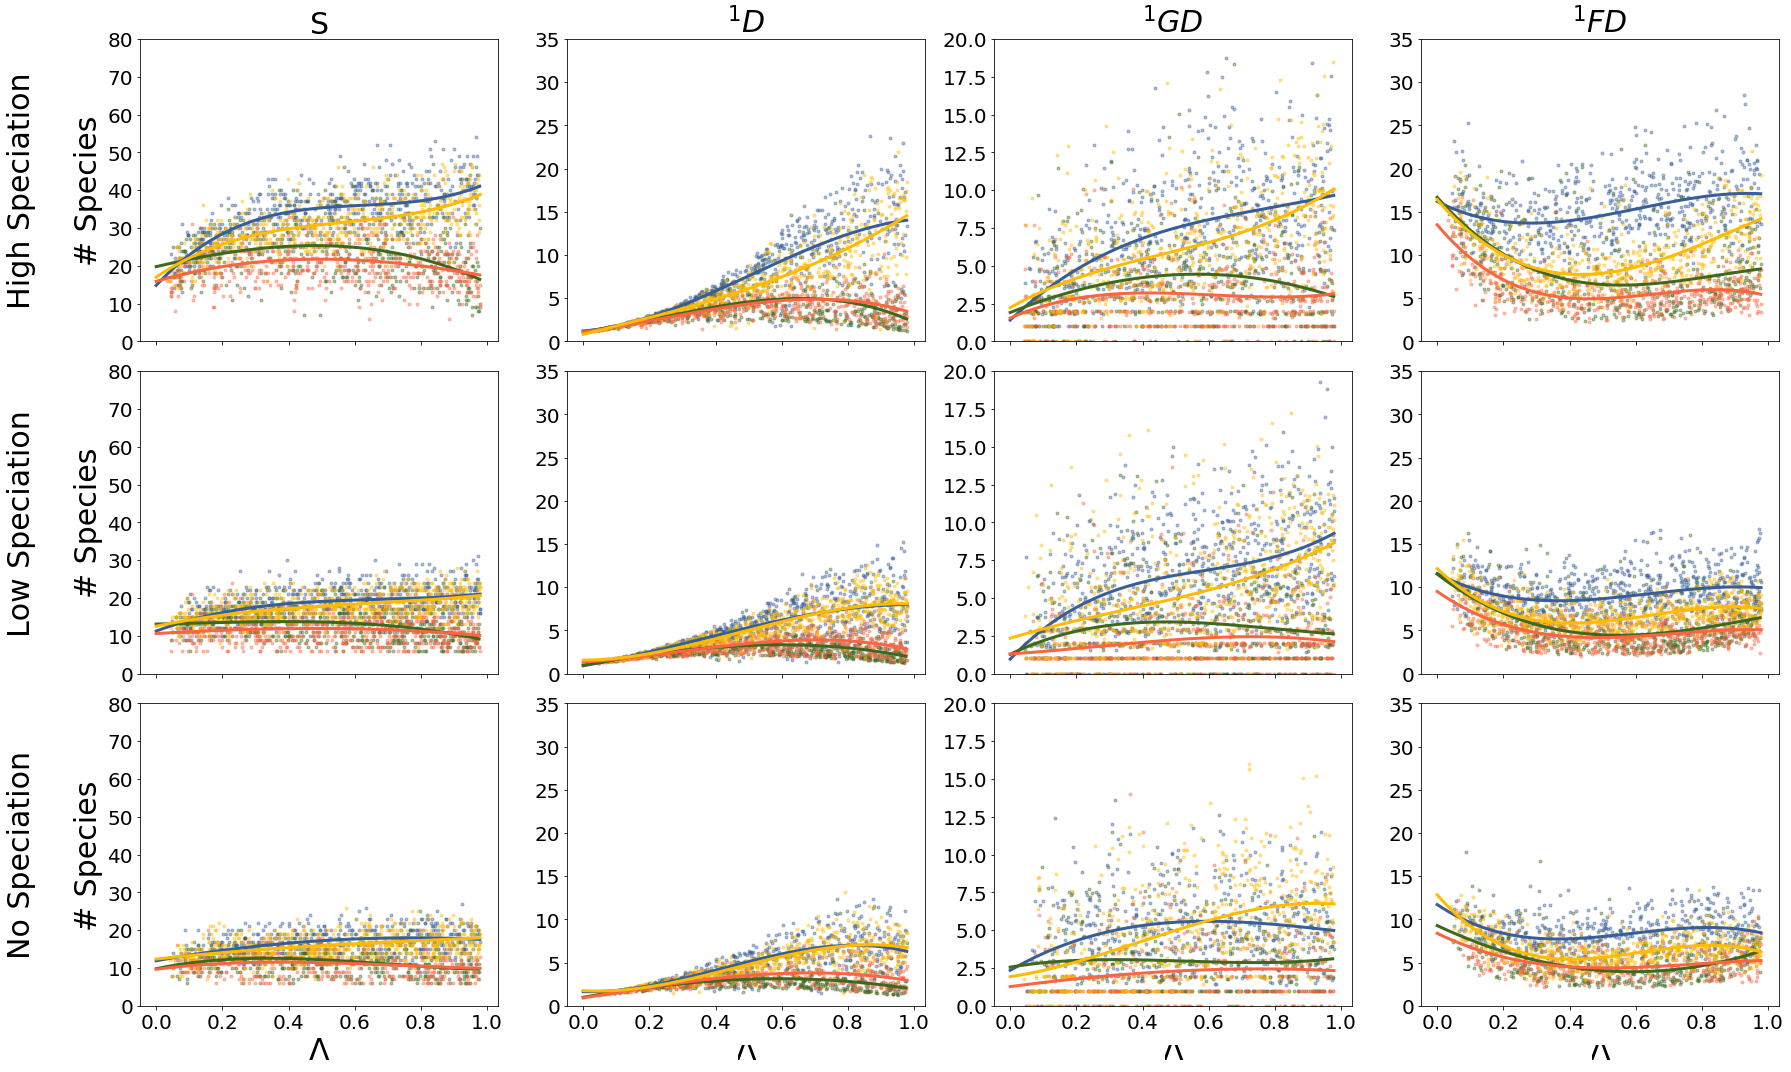

In [19]:
sim_df = pd.read_csv(simfile, sep="\t", header=0)

sim_df = sim_df[sim_df["S"] > 5]

## Remove degenerate trait hill sims
sim_df = sim_df[sim_df["S"] >= sim_df["trait_h1"]]
## Drop sims that are exactly _lambda == 1
sim_df = sim_df[sim_df["_lambda"] < 0.98]
plot_combined_sumstats_through_time(sim_df, scatter=True, normalize_hills=False, n_hills=1, degree=3)

## Prototyping

In [72]:
[x for x in sim_df.columns if "cor" in x]

['abundance_dxy_cor',
 'abundance_pi_cor',
 'abundance_trait_cor',
 'dxy_pi_cor',
 'dxy_trait_cor',
 'pi_trait_cor']

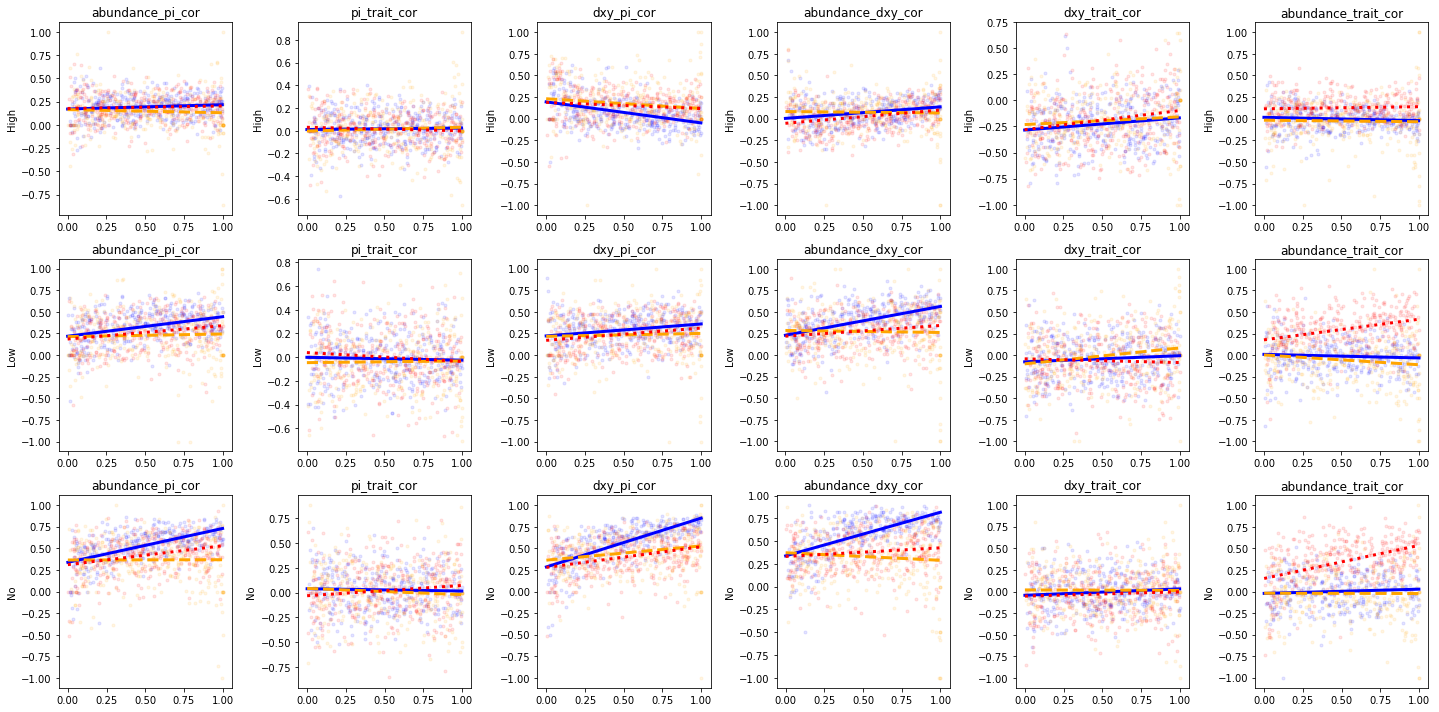

In [8]:
cors = ["abundance_pi_cor", "pi_trait_cor", "dxy_pi_cor",\
"abundance_dxy_cor", "dxy_trait_cor", "abundance_trait_cor"]

def plot_correlations_through_time(sim_df, scatter=True, degree=1):
    ## Get min and max y values so the y values can be scaled identically w/in columns


    fig, axs = plt.subplots(3, 6, figsize=(20, 10))

    for i, (spec_label, spec_prob) in enumerate(zip(["High", "Low", "No"], [0.005, 0.0005, 0])):

        for j, cor in enumerate(cors):
            for model, ls, c in zip(["neutral", "filtering", "competition","pairwise_competition"],\
                                 ["solid", "dashed", "dotted", "solid"],
                                 ["blue", "green", "red", "orange"]):
                x = sim_df.loc[sim_df["community_assembly_model"] == model]
                x = x.loc[x["speciation_prob"] == spec_prob]["_lambda"]
                y = sim_df.loc[sim_df["community_assembly_model"] == model]
                y = y.loc[y["speciation_prob"] == spec_prob][cor]

                z = np.poly1d(np.polyfit(x,y,degree))
                xs_z = np.linspace(0, max(x), 1000)
                if scatter: axs[i][j].scatter(x, y, alpha=0.1, marker='.', c=c)
                axs[i][j].plot(xs_z, z(xs_z), label=model, lw=3, ls=ls, c=c)

                ## Labeling and cleaning up the plots
                axs[i][j].set_title(cor)
                axs[i][j].set_ylabel(spec_label)
    plt.tight_layout()
plot_correlations_through_time(tmp_df, scatter=True)

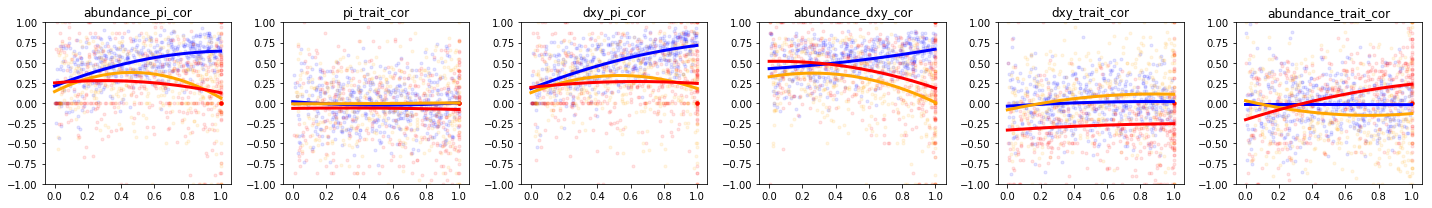

In [300]:
f = "/home/iovercast/Continuosity/MESS/MESS/default_MESS/es_0.001-SIMOUT.txt"
f = "/home/iovercast/Continuosity/MESS/MESS/default_MESS/es_1-SIMOUT.txt"
#f = "/home/iovercast/Continuosity/MESS/MESS/default_MESS/SIMOUT.txt"

#f = "/home/iovercast/Continuosity/MESS/analysis/figure3-sims/es_0.01-J_2000/SIMOUT.txt"
#f = "/home/iovercast/Continuosity/MESS/analysis/figure3-sims/es_1-J_1000/SIMOUT.txt"
#f = "/home/iovercast/Continuosity/MESS/analysis/figure3-sims/es_5-J_2000/SIMOUT.txt"

sim_df = pd.read_csv(simfile, sep="\t", header=0)
fig, axs = plt.subplots(1, 6, figsize=(20, 3))
for j, cor in enumerate(cors):
    scatter=True
    for model, ls, c in zip(["neutral", "filtering", "competition", "pairwise_competition"],\
                         #["solid", "dashed", "dotted"],
                         ["solid", "solid", "solid", "solid"],
                         ["blue", "green", "red", "orange"]):
        x = sim_df.loc[sim_df["community_assembly_model"] == model]
        #x = x["generation"]
        x = x["_lambda"]
        
        y = sim_df.loc[sim_df["community_assembly_model"] == model]
        y = y[cor]

        degree = 2
        z = np.poly1d(np.polyfit(x,y,degree))
        xs_z = np.linspace(0, max(x), 1000)
        if scatter: axs[j].scatter(x, y, alpha=0.1, marker='.', c=c)
        axs[j].plot(xs_z, z(xs_z), label=model, lw=3, ls=ls, c=c)

        ## Labeling and cleaning up the plots
        axs[j].set_title(cor)
        axs[j].set_ylim(-1, 1)
        #axs[j].set_ylabel("No speciation")
#plt.legend()
plt.tight_layout()

In [7]:
simfile_01 = "/home/iovercast/Continuosity/MESS/analysis/figure3-sims/es_0.01-J_2000/SIMOUT.txt"
simfile_1 = "/home/iovercast/Continuosity/MESS/analysis/figure3-sims/es_1-J_1000/SIMOUT.txt"
simfile_5 = "/home/iovercast/Continuosity/MESS/analysis/figure3-sims/es_5-J_2000/SIMOUT.txt"
for f in [simfile_01, simfile_1, simfile_5]:
    tmp_df = pd.read_csv(f, sep="\t", header=0)
    plot_correlations_through_time(tmp_df, scatter=True)

NameError: name 'plot_correlations_through_time' is not defined

In [ ]:
plot_correlations_through_time(tmp_df, scatter=True)

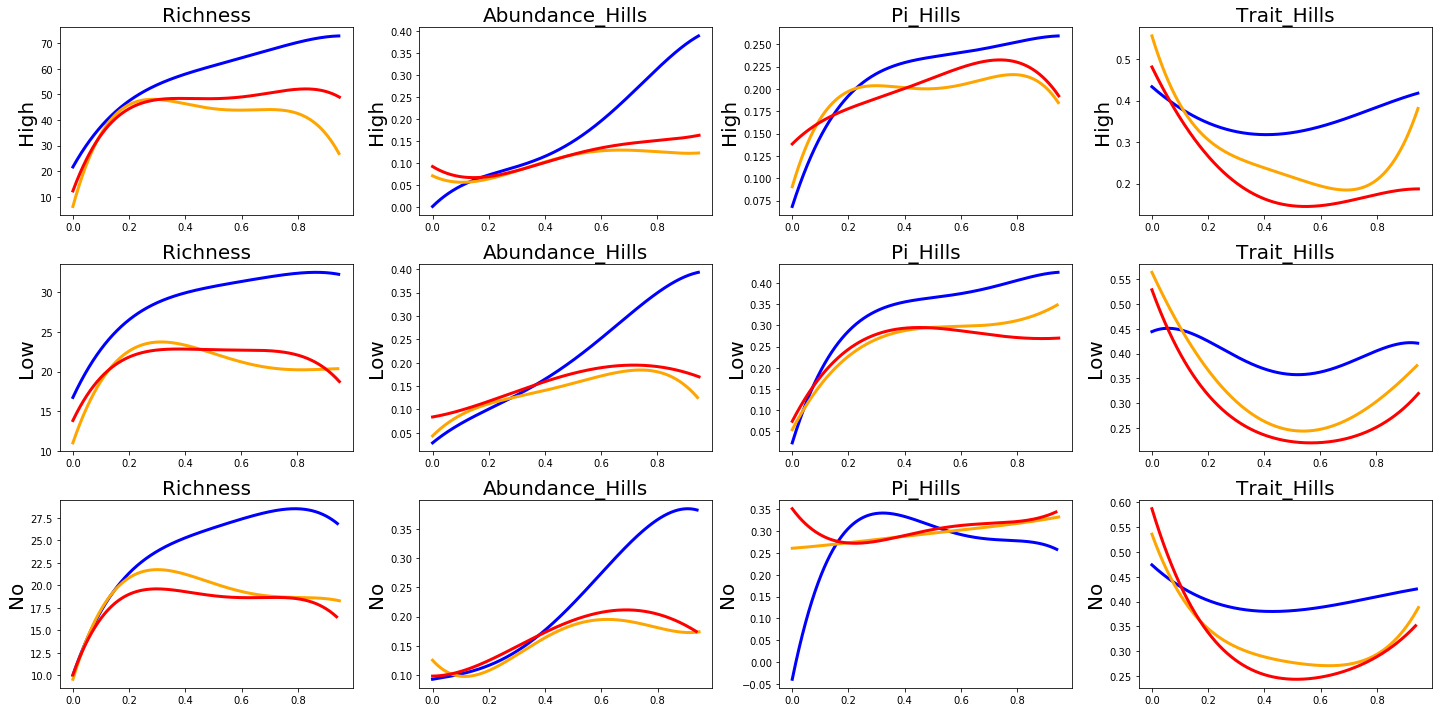

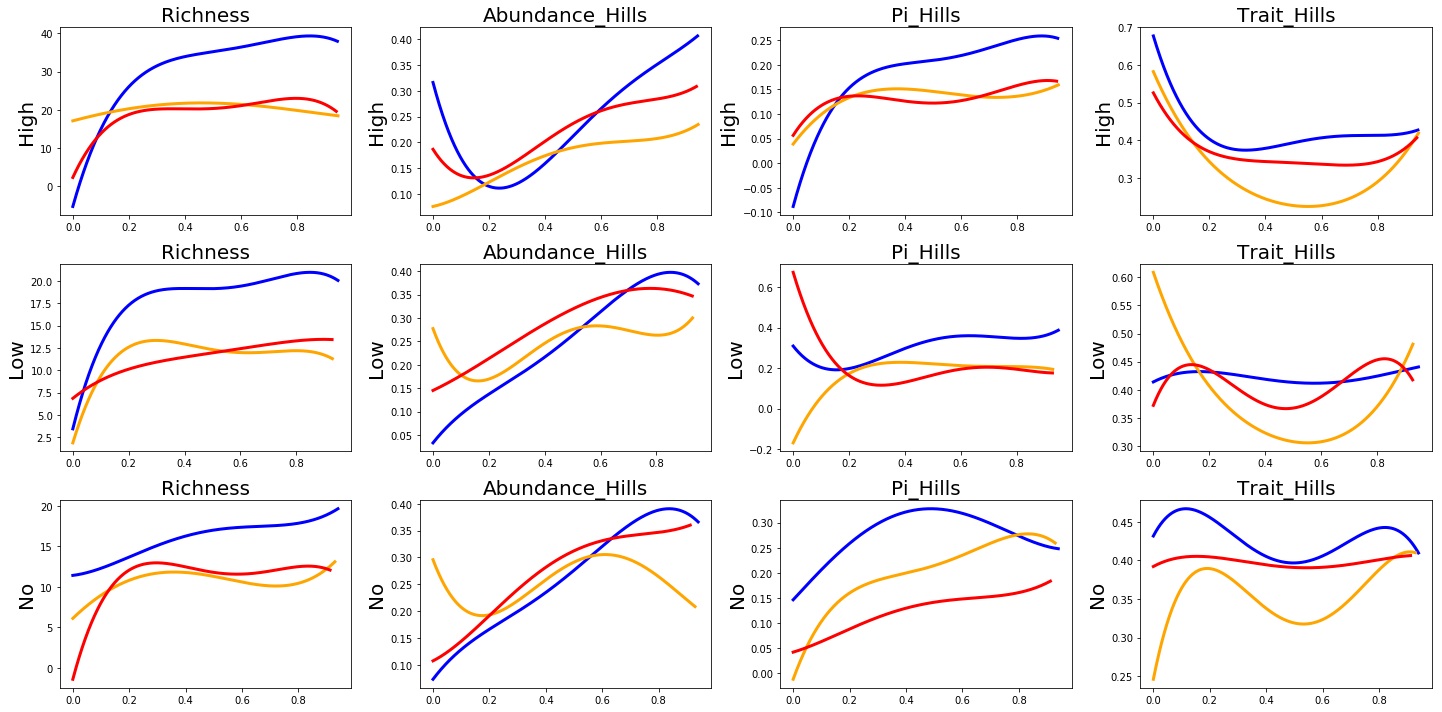

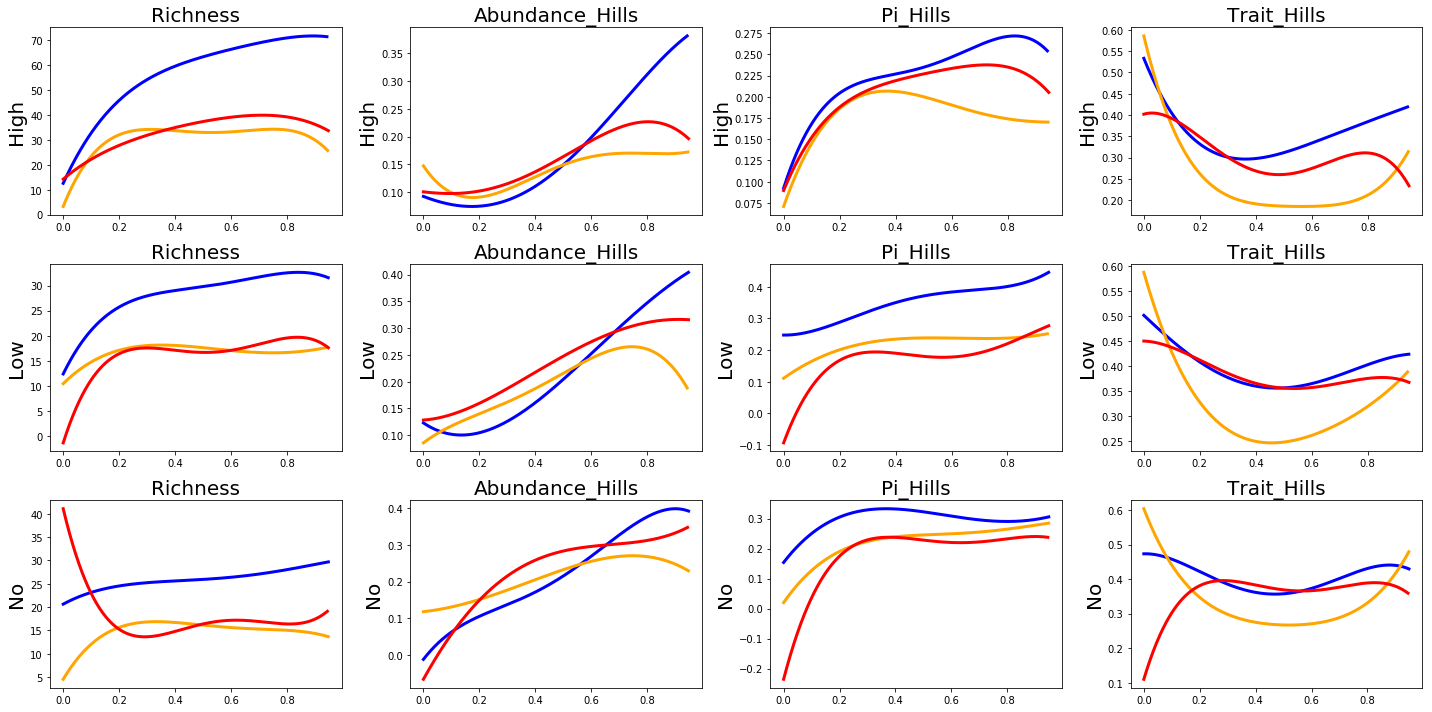

In [301]:
simfile_01 = "/home/iovercast/Continuosity/MESS/analysis/figure3-sims/es_0.01-J_2000/SIMOUT.txt"
simfile_1 = "/home/iovercast/Continuosity/MESS/analysis/figure3-sims/es_1-J_1000/SIMOUT.txt"
simfile_5 = "/home/iovercast/Continuosity/MESS/analysis/figure3-sims/es_5-J_2000/SIMOUT.txt"
for f in [simfile_01, simfile_1, simfile_5]:
    tmp_df = pd.read_csv(f, sep="\t", header=0)
    ## Remove degenerate trait hill sims
    tmp_df = tmp_df[tmp_df["S"]/2. >= tmp_df["trait_h1"]]
    ## Drop sims that are exactly _lambda == 1
    tmp_df = tmp_df[tmp_df["_lambda"] < 0.95]

    #plot_combined_sumstats_through_time(tmp_df, scatter=False, normalize_hills=False, n_hills=1)
    plot_combined_sumstats_through_time(tmp_df, scatter=False, normalize_hills=True, n_hills=1, degree=4)

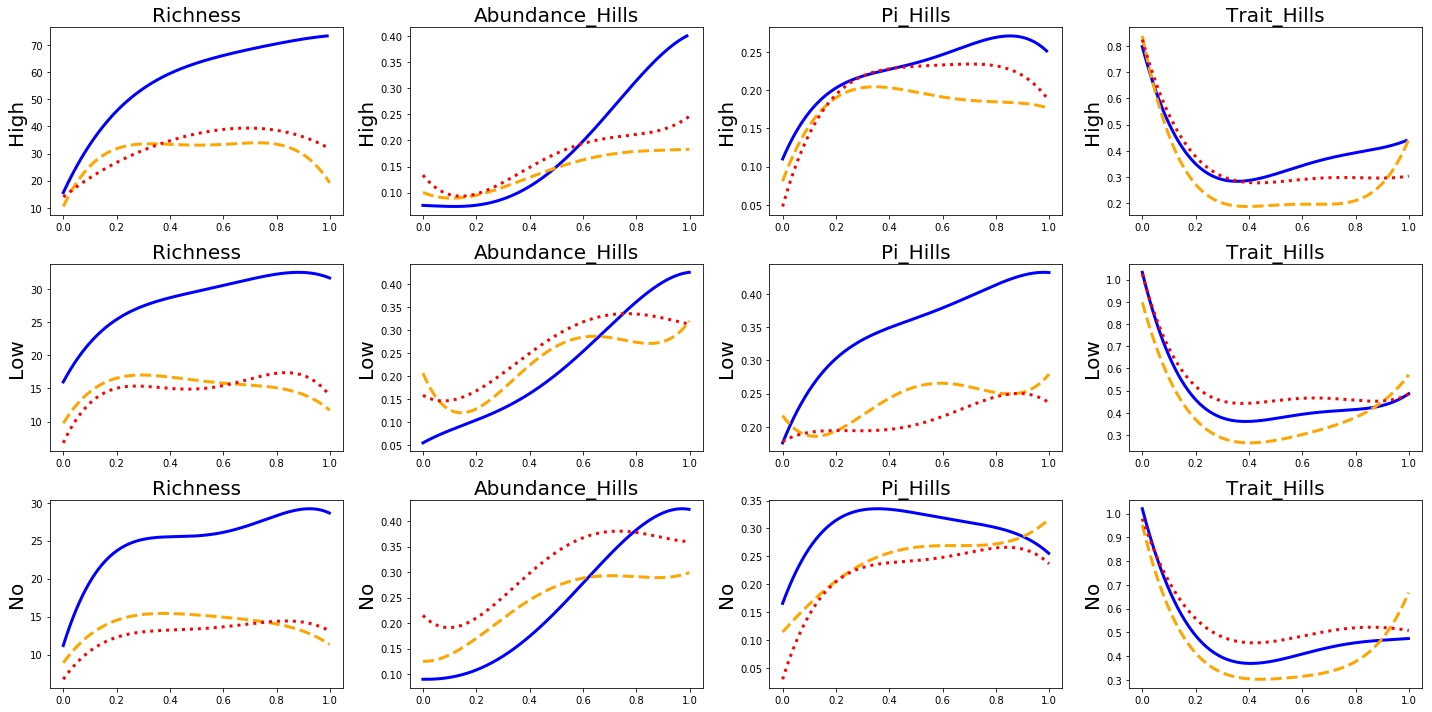

In [265]:
f = "/home/iovercast/Continuosity/MESS/analysis/figure3-sims/es_5-J_2000/SIMOUT.txt"
tmp_df = pd.read_csv(f, sep="\t", header=0)
## Remove degenerate trait hill sims
tmp_df = tmp_df[tmp_df["S"] >= tmp_df["trait_h1"]]
## Drop sims that are exactly _lambda == 1
tmp_df = tmp_df[tmp_df["_lambda"] < 1]

#plot_combined_sumstats_through_time(tmp_df, scatter=False, normalize_hills=False, n_hills=1)
plot_combined_sumstats_through_time(tmp_df, scatter=False, normalize_hills=True, n_hills=1)